<a href="https://colab.research.google.com/github/Bena-29/DATA-SCIENCE/blob/main/Model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn import tree

In [ ]:
##Mlunting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
###importing the dataset
data=pd.read_csv('/content/drive/MyDrive/loan_eligibility_dataset_large.csv')
data

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Years_in_current_job,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquency,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,LN000001,CU000001,1,6063,Short Term,369,5 years,Rent,97933,Buy a Car,1708.45,7.7,110.0,4,1,47753,29959,0.0,0.0
1,LN000002,CU000002,0,41253,Short Term,440,4 years,Rent,32212,Home Improvements,467.45,3.1,31.0,9,0,2076,43274,0.0,0.0
2,LN000003,CU000003,0,30262,Short Term,502,1 years,Own Home,58915,Buy a Car,1835.61,23.7,21.0,5,3,45127,110076,0.0,0.0
3,LN000004,CU000004,1,37536,Short Term,561,10 years,Rent,112480,Home Improvements,298.35,1.1,115.0,7,3,82999,26555,0.0,0.0
4,LN000005,CU000005,1,5880,Long Term,778,1 years,Rent,60019,Business Loan,1131.11,26.5,34.0,8,4,12993,96701,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,LN099996,CU099996,0,21323,Short Term,337,8 years,Rent,78955,Business Loan,1053.27,29.4,NaN,24,1,36182,132264,0.0,1.0
99996,LN099997,CU099997,0,19158,Long Term,702,6 years,Rent,77116,Home Improvements,1026.94,27.1,62.0,13,3,26348,43536,0.0,0.0
99997,LN099998,CU099998,1,38713,Short Term,567,< 1 year,Home Mortgage,69427,Home Improvements,1205.37,2.0,6.0,13,0,60141,10546,0.0,0.0
99998,LN099999,CU099999,1,18105,Short Term,500,8 years,Own Home,98044,Debt Consolidation,1534.85,1.2,45.0,1,4,92921,140283,1.0,0.0


In [ ]:
####chaging  years in current job from object to float

data['Years_in_current_job'] = data['Years_in_current_job'].str.replace(' years', '', regex=False)
data['Years_in_current_job'] = data['Years_in_current_job'].str.replace('< 1 year', '0.5', regex=False)
data['Years_in_current_job'] = data['Years_in_current_job'].str.replace('10+', '10', regex=False)

data['Years_in_current_job'] = data['Years_in_current_job'].astype(float)

data.head()

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Years_in_current_job,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquency,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,LN000001,CU000001,1,6063,Short Term,369,5.0,Rent,97933,Buy a Car,1708.45,7.7,110.0,4,1,47753,29959,0.0,0.0
1,LN000002,CU000002,0,41253,Short Term,440,4.0,Rent,32212,Home Improvements,467.45,3.1,31.0,9,0,2076,43274,0.0,0.0
2,LN000003,CU000003,0,30262,Short Term,502,1.0,Own Home,58915,Buy a Car,1835.61,23.7,21.0,5,3,45127,110076,0.0,0.0
3,LN000004,CU000004,1,37536,Short Term,561,10.0,Rent,112480,Home Improvements,298.35,1.1,115.0,7,3,82999,26555,0.0,0.0
4,LN000005,CU000005,1,5880,Long Term,778,1.0,Rent,60019,Business Loan,1131.11,26.5,34.0,8,4,12993,96701,0.0,0.0


In [ ]:
##class imbalance
data['Loan_Status'].value_counts()

,count
Loan_Status,
1,70111
0,29889


In [ ]:
####Targets and features
y=data['Loan_Status']
y
x=data.drop('Loan_Status',axis=1)
x=x.drop('Loan_ID',axis=1)
x=x.drop('Customer_ID',axis=1)
x

,Current_Loan_Amount,Term,Credit_Score,Years_in_current_job,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquency,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,6063,Short Term,369,5.0,Rent,97933,Buy a Car,1708.45,7.7,110.0,4,1,47753,29959,0.0,0.0
1,41253,Short Term,440,4.0,Rent,32212,Home Improvements,467.45,3.1,31.0,9,0,2076,43274,0.0,0.0
2,30262,Short Term,502,1.0,Own Home,58915,Buy a Car,1835.61,23.7,21.0,5,3,45127,110076,0.0,0.0
3,37536,Short Term,561,10.0,Rent,112480,Home Improvements,298.35,1.1,115.0,7,3,82999,26555,0.0,0.0
4,5880,Long Term,778,1.0,Rent,60019,Business Loan,1131.11,26.5,34.0,8,4,12993,96701,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,21323,Short Term,337,8.0,Rent,78955,Business Loan,1053.27,29.4,NaN,24,1,36182,132264,0.0,1.0
99996,19158,Long Term,702,6.0,Rent,77116,Home Improvements,1026.94,27.1,62.0,13,3,26348,43536,0.0,0.0
99997,38713,Short Term,567,0.5,Home Mortgage,69427,Home Improvements,1205.37,2.0,6.0,13,0,60141,10546,0.0,0.0
99998,18105,Short Term,500,8.0,Own Home,98044,Debt Consolidation,1534.85,1.2,45.0,1,4,92921,140283,1.0,0.0


In [ ]:
####Split and Train
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

       Current_Loan_Amount        Term  Credit_Score  Years_in_current_job  \
76513                 4984   Long Term           514                   6.0   
60406                49932   Long Term           513                   3.0   
27322                27836  Short Term           555                   4.0   
53699                 8387   Long Term           494                   NaN   
65412                49604  Short Term           765                   5.0   
...                    ...         ...           ...                   ...   
6265                 29623  Short Term           787                  10.0   
54886                44643  Short Term           728                   8.0   
76820                21879   Long Term           820                   1.0   
860                  10568  Short Term           796                   9.0   
15795                21442  Short Term           354                  10.0   

      Home_Ownership  Annual_Income             Purpose  Monthl

**IMPUTING FOR MISSING **

In [ ]:

# with the 'number' value we are returning all numeric columns- integer columns
# and float excluding tac liens and bankrupticies



num_cols=x_train.select_dtypes('number').columns
num_cols

Index(['Current_Loan_Amount', 'Credit_Score', 'Years_in_current_job',
       'Annual_Income', 'Monthly_Debt', 'Years_of_Credit_History',
       'Months_since_last_delinquency', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens'],
      dtype='object')

In [ ]:
x_train[num_cols].isna().sum()

,0
Current_Loan_Amount,0
Credit_Score,0
Years_in_current_job,5721
Annual_Income,0
Monthly_Debt,0
Years_of_Credit_History,0
Months_since_last_delinquency,6980
Number_of_Open_Accounts,0
Number_of_Credit_Problems,0
Current_Credit_Balance,0


In [ ]:
##imputing for issing values using the simple imputer
impute_median = SimpleImputer(strategy='median')
impute_median.fit(x_train[num_cols])

SimpleImputer(strategy='median')

In [ ]:
from sklearn import set_config
set_config(transform_output='pandas')

In [ ]:
#Transform the training data
x_train_imputed= impute_median.transform(x_train[num_cols])
#Transform the testing data
x_test_imputed = impute_median.transform(x_test[num_cols])

In [ ]:
#TRANSFORMATION
impute_median.transform(x_train[num_cols])
impute_median.transform(x_test[num_cols])

,Current_Loan_Amount,Credit_Score,Years_in_current_job,Annual_Income,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquency,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
75721,38882.0,667.0,8.0,80586.0,1254.59,30.0,47.0,15.0,3.0,41170.0,96501.0,0.0,0.0
80184,36051.0,600.0,2.0,114882.0,1132.78,10.8,117.0,20.0,4.0,39071.0,127276.0,1.0,1.0
19864,9990.0,460.0,5.0,89353.0,1970.74,27.0,28.0,12.0,3.0,69942.0,39838.0,0.0,0.0
76699,5745.0,443.0,7.0,63058.0,847.82,4.3,40.0,14.0,4.0,24592.0,83203.0,0.0,0.0
92991,5026.0,539.0,5.0,67463.0,1458.07,29.7,39.0,4.0,2.0,64307.0,49336.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42648,12344.0,310.0,2.0,91282.0,345.01,15.4,84.0,15.0,0.0,9035.0,42135.0,1.0,0.0
86306,6516.0,750.0,0.5,44136.0,1654.72,23.6,60.0,6.0,0.0,83872.0,89062.0,0.0,0.0
45466,3323.0,785.0,7.0,27603.0,446.52,3.3,47.0,24.0,4.0,62287.0,141731.0,0.0,0.0
63724,35337.0,521.0,5.0,142046.0,1792.66,2.3,15.0,11.0,2.0,89918.0,8229.0,0.0,0.0


In [ ]:
x_train[num_cols].isna().sum()

,0
Current_Loan_Amount,0
Credit_Score,0
Years_in_current_job,5721
Annual_Income,0
Monthly_Debt,0
Years_of_Credit_History,0
Months_since_last_delinquency,6980
Number_of_Open_Accounts,0
Number_of_Credit_Problems,0
Current_Credit_Balance,0


In [ ]:
#Checking for missing values in the training set
null_counter1 = x_train_imputed[num_cols].isna().sum()
null_counter1[null_counter1>0]
#checking for missing values in the test set- after transformation
null_counter2 = x_test_imputed[num_cols].isna().sum()
null_counter2[null_counter2>0]

,0


In [ ]:
#Checking for missing values in the training set
null_counter1 = x_train_imputed[num_cols].isna().sum()
null_counter1[null_counter1>0]
#checking for missing values in the test set- after transformation
null_counter2 = x_test_imputed[num_cols].isna().sum()
null_counter2[null_counter2>0]

,0


In [ ]:
#Checking for categoricaal values

# 1. selected columns of string data type
cat_cols= x_train.select_dtypes('object').columns
cat_cols

Index(['Term', 'Home_Ownership', 'Purpose'], dtype='object')

In [ ]:
##checking for missing values
x_train[cat_cols].isna().sum()

,0
Term,0
Home_Ownership,0
Purpose,0


In [ ]:
##One hot encoding
# saving list of categorical features to one-hot-encode
ohe_cols = cat_cols
ohe_cols


Index(['Term', 'Home_Ownership', 'Purpose'], dtype='object')

In [ ]:
# Instantiate one hot encoder
from sklearn.preprocessing import OneHotEncoder
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [ ]:
# Fit the OneHotEncoder on the training data
ohe_encoder.fit(x_train[ohe_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [ ]:
X_train_cat_ohe = ohe_encoder.transform(x_train[ohe_cols])
X_train_cat_ohe

,Term_Long Term,Term_Short Term,Home_Ownership_Home Mortgage,Home_Ownership_Own Home,Home_Ownership_Rent,Purpose_Business Loan,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Home Improvements,Purpose_Medical Bills
76513,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
60406,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27322,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
53699,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
65412,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
6265,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
54886,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
76820,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
860,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_test_cat_ohe = ohe_encoder.transform(x_test[ohe_cols])
X_test_cat_ohe

,Term_Long Term,Term_Short Term,Home_Ownership_Home Mortgage,Home_Ownership_Own Home,Home_Ownership_Rent,Purpose_Business Loan,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Home Improvements,Purpose_Medical Bills
75721,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
80184,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19864,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
76699,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
92991,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
42648,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
86306,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
45466,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
63724,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Concatenate imputed numeric and one-hot encoded categorical features for the entire dataset
x_processed = pd.concat([x_train_imputed, X_train_cat_ohe], axis=1) # Use x_train_imputed and X_train_cat_ohe
y_processed = y_train

In [ ]:
len(x_processed)


70000

In [ ]:
len(y_processed)

70000

In [ ]:
###dealing wiith the class imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_processed, y_processed = smote.fit_resample(x_processed, y_processed)

In [ ]:
####Data Modeling
#1.using decision tree
# Instantiate a default decision tree
dec_tree = DecisionTreeClassifier(random_state = 42)
# Model training
#Fit on the training data
dec_tree.fit(x_processed, y_processed)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Testing the model -Obtain predictions

#dec_tree.predict(X_train)
# Concatenate the imputed numerical and one-hot encoded categorical features for the test set
x_test_processed = pd.concat([x_test_imputed, X_test_cat_ohe], axis=1)

test_preds = dec_tree.predict(x_test_processed)  #test on new instances which are not labelled
test_preds

#dec_tree.predict(X_test)

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
#Evaluating the model - test set - actual values(y_test) and pred_values

print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.30      0.32      0.31      8984
           1       0.70      0.67      0.69     21016

    accuracy                           0.57     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.58      0.57      0.57     30000



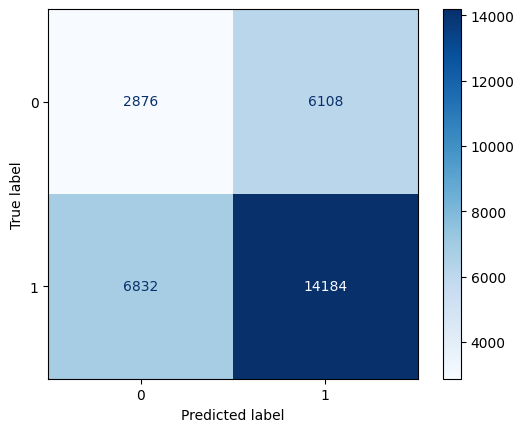

In [ ]:
confusion_matrix(y_test, test_preds)
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, cmap='Blues')

In [ ]:
##using the k nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_processed, y_processed)

KNeighborsClassifier()

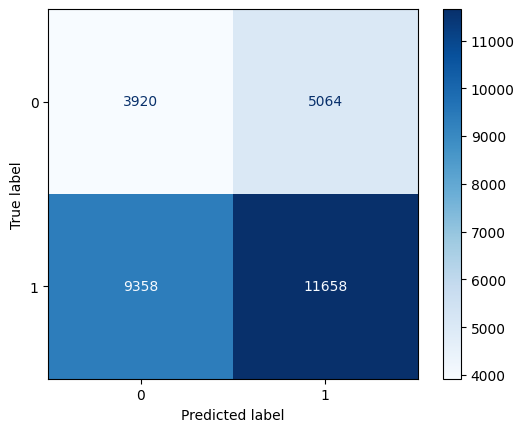

In [ ]:
##tesying the model using the confusion matrix
test_preds = knn.predict(x_test_processed)
###creating a cnfusion matrix
confusion_matrix(y_test, test_preds)
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, cmap='Blues')

In [ ]:
###scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_processed)
x_processed = scaler.transform(x_processed)
x_test_processed = scaler.transform(x_test_processed)


In [ ]:
##confusion matrix
test_preds = knn.predict(x_test_processed)
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      8984
           1       0.70      1.00      0.82     21016

    accuracy                           0.70     30000
   macro avg       0.35      0.50      0.41     30000
weighted avg       0.49      0.70      0.58     30000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
##using random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_processed, y_processed)


RandomForestClassifier(random_state=42)

In [ ]:
##Evaluating the model
test_preds = rf.predict(x_test_processed)
print(classification_report(y_test, test_preds))


              precision    recall  f1-score   support

           0       0.35      0.01      0.02      8984
           1       0.70      0.99      0.82     21016

    accuracy                           0.70     30000
   macro avg       0.53      0.50      0.42     30000
weighted avg       0.60      0.70      0.58     30000



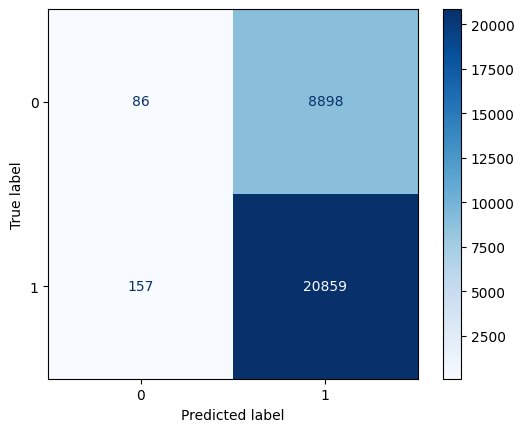

In [ ]:
##confuson  matrix
confusion_matrix(y_test, test_preds)
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, cmap='Blues')

In [ ]:
### using XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier(class_weight='balanced',random_state=42)

xgb.fit(x_processed, y_processed)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:15:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "class_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, ...)

In [ ]:
##confusion matrix
test_preds = xgb.predict(x_test_processed)
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.28      0.02      0.04      8984
           1       0.70      0.98      0.82     21016

    accuracy                           0.69     30000
   macro avg       0.49      0.50      0.43     30000
weighted avg       0.57      0.69      0.58     30000



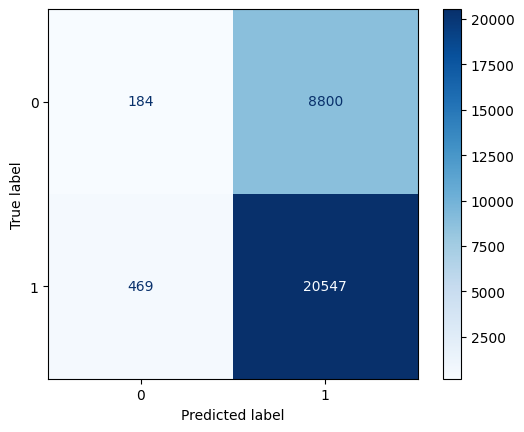

In [ ]:
confusion_matrix(y_test, test_preds)
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, cmap='Blues')
